In [2]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (12, 7)

In [3]:
data = pd.read_csv("__MY_DATASET_PLACEHOLDER__")

# tu si prosím svoj dataset s hlasovaním upravte tak, aby zodpovedal očakávaným názvom a hodnotám

data.drop(columns=["Unnamed: 0"], inplace=True)
data.rename(
    columns={
        "Jméno": "name", "Strana": "party", "Um. id.": "vote_id", "Hlas": "vote"
    },
    inplace=True
)

In [39]:
data.head()

,name,party,vote_id,vote
0,Věra Adámková,ANO,0,1
1,Andrej Babiš,ANO,0,1
2,Andrea Babišová,ANO,0,1
3,Margita Balaštíková,ANO,0,1
4,Josef Bělica,ANO,0,1


## Úloha 1

Odchody poslancov a prebehnutia medzi stranami

### Odchody poslancov zo snemovne:
odišiel taký poslanec, ktorý nemá evidované nejaký hlas pre každé hlasovanie a zároveň nemá hlas na poslednej schôdzi

In [4]:
total_votings = len(data["vote_id"].unique())

In [5]:
deputy_votes = data.groupby("name").count()["vote"]
deputy_votes

name
Adam Kalous                     6980
Adam Vojtěch                    6980
Alena Gajdůšková                6980
Alexander Černý                 6980
Aleš Juchelka                   6980
                                ... 
Zbyněk Stanjura                 6980
Zdeněk Ondráček                 6980
Zdeněk Podal                    6980
Zuzana Majerová Zahradníková    6980
Zuzana Ožanová                  6980
Name: vote, Length: 213, dtype: int64

In [6]:
deputies_not_whole_time = deputy_votes[deputy_votes < total_votings]
deputies_not_whole_time

name
Bohuslav Sobotka                498
Dan Ťok                        2464
Eva Matyášová                  6964
František Navrkal              3493
Irena Blažková                  433
Iva Kalátová                   4516
Jaroslava Pokorná Jermanová      16
Jiří Hlavatý                     16
Marie Pěnčíková                5434
Martin Půta                      16
Martin Stropnický              1210
Mikuláš Peksa                  3487
Milan Chovanec                 2464
Milan Pour                     6964
Monika Červíčková              6103
Ondřej Babka                   3253
Petr Bendl                     3253
Petr Pávek                     6964
Petr Venhoda                   5770
Petr Vrána                     6547
Radka Maxová                   3727
Robert Pelikán                  877
Roman Sklenák                  6482
Veronika Vrecionová            3727
Vladimír Koníček               1546
Václav Votava                  4516
Name: vote, dtype: int64

In [7]:
deputies_new = deputies_not_whole_time[
    deputies_not_whole_time.index.isin(
        data[data["vote_id"] == data["vote_id"].max()]["name"]
    )
]
deputies_left = deputies_not_whole_time[deputies_not_whole_time.index.symmetric_difference(deputies_new.index)]

In [8]:
deputies_left

name
Bohuslav Sobotka                498
Dan Ťok                        2464
Jaroslava Pokorná Jermanová      16
Jiří Hlavatý                     16
Martin Půta                      16
Martin Stropnický              1210
Mikuláš Peksa                  3487
Milan Chovanec                 2464
Petr Vrána                     6547
Radka Maxová                   3727
Robert Pelikán                  877
Veronika Vrecionová            3727
Vladimír Koníček               1546
Name: vote, dtype: int64

In [9]:
deputies_new

name
Eva Matyášová        6964
František Navrkal    3493
Irena Blažková        433
Iva Kalátová         4516
Marie Pěnčíková      5434
Milan Pour           6964
Monika Červíčková    6103
Ondřej Babka         3253
Petr Bendl           3253
Petr Pávek           6964
Petr Venhoda         5770
Roman Sklenák        6482
Václav Votava        4516
Name: vote, dtype: int64

<AxesSubplot:ylabel='name'>

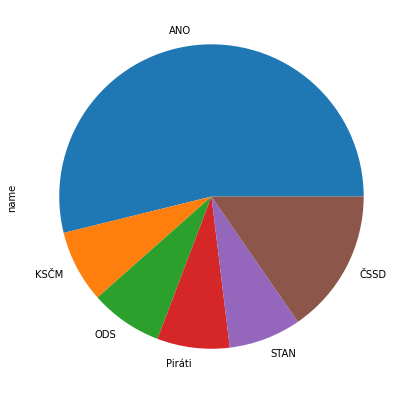

In [10]:
data[data["name"].isin(deputies_left.index)].groupby("party")["name"].nunique().plot(kind="pie")

<AxesSubplot:xlabel='party'>

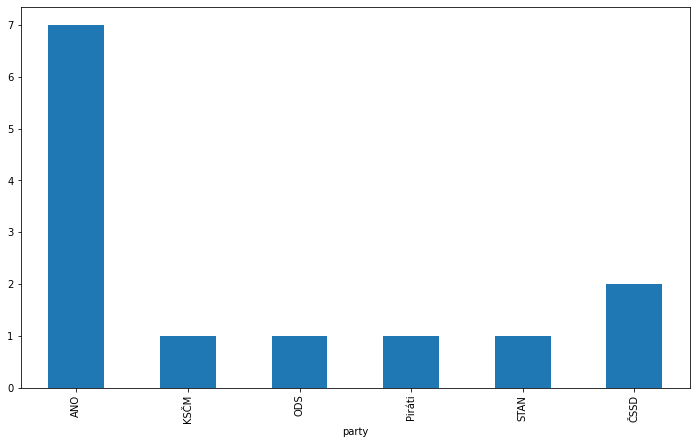

In [11]:
data[data["name"].isin(deputies_left.index)].groupby("party")["name"].nunique().plot(kind="bar")

### Prechody poslancov medzi stranami

In [12]:
party_vote_id_count = data.groupby(["vote_id", "party"]).size().unstack().fillna(0.0)
party_vote_id_count

party,ANO,KDU-ČSL,KSČM,Nezařaz,ODS,Piráti,SPD,STAN,TOP09,ČSSD
vote_id,,,,,,,,,,
0,78.0,10.0,15.0,0.0,25.0,22.0,22.0,6.0,7.0,15.0
1,78.0,10.0,15.0,0.0,25.0,22.0,22.0,6.0,7.0,15.0
2,78.0,10.0,15.0,0.0,25.0,22.0,22.0,6.0,7.0,15.0
3,78.0,10.0,15.0,0.0,25.0,22.0,22.0,6.0,7.0,15.0
4,78.0,10.0,15.0,0.0,25.0,22.0,22.0,6.0,7.0,15.0
...,...,...,...,...,...,...,...,...,...,...
6978,78.0,10.0,15.0,6.0,23.0,22.0,19.0,6.0,7.0,14.0
6979,78.0,10.0,15.0,6.0,23.0,22.0,19.0,6.0,7.0,14.0
6980,78.0,10.0,15.0,6.0,23.0,22.0,19.0,6.0,7.0,14.0


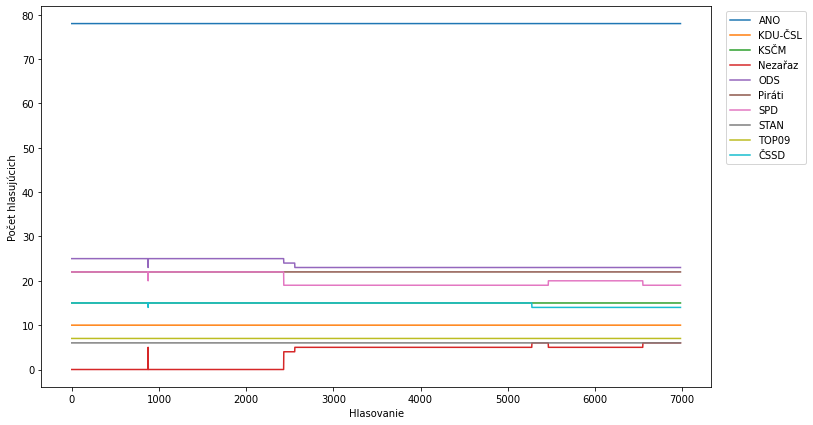

In [38]:
party_vote_id_count.plot(xlabel="Hlasovanie", ylabel="Počet hlasujúcich")

plt.legend(bbox_to_anchor=(1.15, 1))  # nastavenie umiestnenia legendy

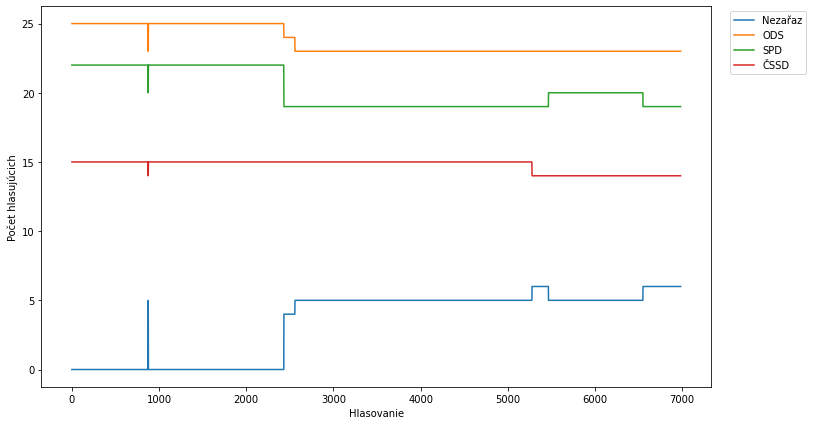

In [36]:
unchanged_party_members = [
    column 
    for column in party_vote_id_count.columns 
    if len(party_vote_id_count[column].unique()) == 1
]

party_vote_id_count.drop(columns=unchanged_party_members).plot(xlabel="Hlasovanie", ylabel="Počet hlasujúcich")

plt.legend(bbox_to_anchor=(1.15, 1))  # nastavenie umiestnenia legendy

## Úloha 3

Ako často strany hlasujú v zhode a ako často proti sebe.

Využijeme koeficient korelácie medzi jednotlivými stranami naprieč všetkými hlasovaniami.

Transformácia hlasov na číselné hodnoty:
- **A** ->  1
- **N** -> -1
- **0** ->  0
- **M** ->  0
- **Z** -> -1  (zdržanie znamená nepodporenie návrhu, respektíve spôsobenie istej obštrukcie, počítam ho teda ako hlasovanie proti)

In [15]:
data["vote"] = data["vote"].replace({"A": 1, "N": -1, "Z": -1, "0": 0, "M": 0})

In [16]:
party_votes = data.groupby(["vote_id", "party"]).apply(lambda d: d["vote"].mode()[0])

In [17]:
corr_matrix = party_votes.unstack().fillna(0.0).corr()

<AxesSubplot:xlabel='party', ylabel='party'>

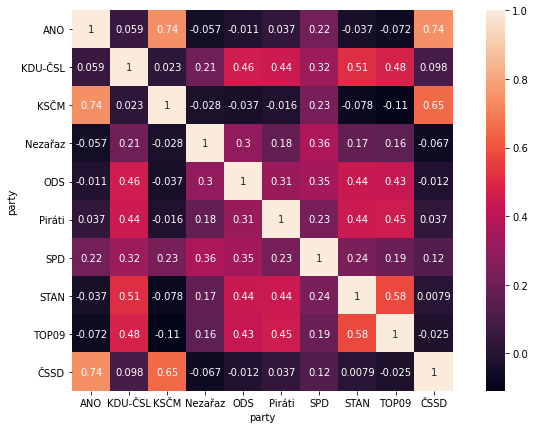

In [18]:
import seaborn as sns

sns.heatmap(corr_matrix, square=True, annot=True)